# NADE (Neural Autoregressive Distribution Estimation)

https://github.com/modulabs/Deep-Generative-Models/blob/master/1st/3.Autoregressive%20Models%20-%20Practice/NADE.ipynb

In [5]:
import numpy as np
import tensorflow as tf
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

11501568/11490434 [==============================] - 0s 0us/step


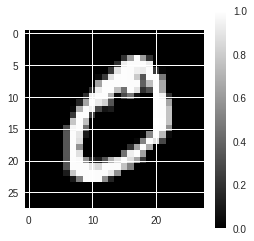

In [6]:
import matplotlib.pyplot as plt
plt.figure(figsize = [4,4])   # 보여줄 크기
plt.imshow(x_train[1], cmap='gray')
plt.colorbar()
plt.show()

In [0]:
# Hyperparameters

Batch = None
Height = 28
Width = 28
Xdim = Height * Width
Hdim = 500

In [8]:
_mask = np.fromfunction(lambda i, j: i > j, [Xdim, Xdim], dtype=int).astype(np.float32)
print(_mask)

[[0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 1. 0. ... 0. 0. 0.]
 ...
 [1. 1. 1. ... 0. 0. 0.]
 [1. 1. 1. ... 1. 0. 0.]
 [1. 1. 1. ... 1. 1. 0.]]


In [11]:
from tqdm import tqdm_notebook as tqdm
tf.reset_default_graph()

# placeholder for data
X = tf.placeholder(dtype=tf.float32, shape=[Batch, Height * Width])  # image가 flatten된 형태
X_past = tf.concat([tf.zeros(shape=[tf.shape(X)[0], 1]), X[:, :-1]], axis=1)  # 1-dim (flatten) 기준으로 concat -> 해당 dim의 개수가 바뀜
# tf.shape(X)[0] = Batch
# 첫 열은 0, 나머지 오른쪽 열은 X와 같음 (X의 제일 마지막 열 제외)
# 결국, X_past 도 concat( (Batch, 1), (Batch, tf.shape(X)[1]-1), axis =1 ) -> (Batch, tf.shape(X)[1]) -> X와 같은 shape
# x_past -> for hidden layer

W = tf.get_variable('W', shape=[Xdim, Hdim], dtype=tf.float32)
c = tf.get_variable('c', shape=[Hdim], dtype=tf.float32)

# list of hidden layers
hidden_list = []
for i in tqdm(range(Xdim)):  # Xdim만큼의 hidden layer 생성
    hidden = tf.nn.tanh(tf.matmul(X_past[:, :i], W[:i]) + c)  # @ = tf.matmul
    # i = 1; X_past[:, :i] == 원소가 전부 0인 (Batch, 1) shape 행렬 -> hidden_list[1] = 원소가 전부 c이고 shape이 (Batch, 1)인 행렬
    hidden_list.append(hidden)
    # tf.shape(hidden_list[i]) == (Batch, (i+1))

outputs_list = []
outputs_prob_list = []
for i in tqdm(range(Xdim)):
    outputs = tf.layers.dense(hidden_list[i], 1, name='output_layer' + str(i))
    #  tf.layers.dense(inputs, units, ...)
    #     _Output tensor the same shape as inputs except the last dimension is of size units   == (Batch, 1)
    outputs = tf.squeeze(outputs, axis=1)
    outputs_list.append(outputs)
    outputs_prob_list.append(tf.nn.sigmoid(outputs))
    
outputs = tf.stack(outputs_list, axis = 1)  # values, axis = 0  // 0-dim은 유지한채 stack  ->  처읨 flattened과 같은 형태
outputs_prob = tf.nn.sigmoid(outputs)
print(outputs)


# cross entropy = tf.nn.sigmoid_cross_entropy_with_logits(labels=X, logits=output)
cross_entropy = -(X * tf.log(outputs_prob) + (1. - X) * tf.log(1. - outputs_prob))
loss = tf.reduce_mean(cross_entropy)

# optimization
optim = tf.train.AdamOptimizer(learning_rate=1e-4).minimize(loss)

# session create
sess = tf.Session()
sess.run(tf.global_variables_initializer())

print('done')


Tensor("stack:0", shape=(?, 784), dtype=float32)
done


In [21]:
from IPython.display import clear_output
from tqdm import tqdm_notebook as tqdm

batch_size = 100

#while(True):
for _ in tqdm(range(500)):
    indexes = np.random.randint(0, len(x_train), batch_size)   # low, high, size -> Return random integers from low (inclusive) to high (exclusive).
    # indexes's shape = (Batch, )
    _X = x_train[indexes]  # x_train에서 mini-batch 가져옴
    _X = np.reshape(_X + 0.5, [_X.shape[0], -1]).astype(np.int)
    #    => (_X + 0.5)를 내림한 것을 (batch, )로 reshape
    # _X shape : (batch, 28*28)

    _, _loss, _outputs = sess.run([optim, loss, outputs_prob], feed_dict={X: _X})
    print('loss : ', _loss)

#clear_output()

('loss : ', 0.16493732)
('loss : ', 0.15636255)
('loss : ', 0.15558057)
('loss : ', 0.15617299)
('loss : ', 0.15540132)
('loss : ', 0.14944826)
('loss : ', 0.16589789)
('loss : ', 0.15354072)
('loss : ', 0.16541275)
('loss : ', 0.16096143)
('loss : ', 0.16354041)
('loss : ', 0.15671922)
('loss : ', 0.15538158)
('loss : ', 0.16935582)
('loss : ', 0.15811054)
('loss : ', 0.15988706)
('loss : ', 0.15844347)
('loss : ', 0.16190387)
('loss : ', 0.15848969)
('loss : ', 0.15929857)
('loss : ', 0.17277232)
('loss : ', 0.15978794)
('loss : ', 0.15569806)
('loss : ', 0.16280511)
('loss : ', 0.15506758)
('loss : ', 0.1593484)
('loss : ', 0.15996179)
('loss : ', 0.17101999)
('loss : ', 0.16186957)
('loss : ', 0.15600249)
('loss : ', 0.158542)
('loss : ', 0.15773572)
('loss : ', 0.15636899)
('loss : ', 0.15786621)
('loss : ', 0.15513591)
('loss : ', 0.1551669)
('loss : ', 0.16701138)
('loss : ', 0.16156903)
('loss : ', 0.15918913)
('loss : ', 0.15628754)
('loss : ', 0.16420151)
('loss : ', 0.162675

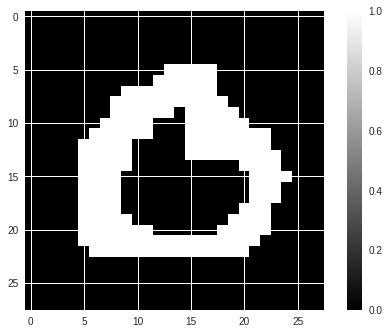

In [22]:
# _X shape : (batch, 28*28)
_X = np.reshape(_X[0], [28, 28])   # -> (batch, 28, 28)
plt.imshow(_X, cmap='gray')
plt.colorbar()
plt.show()

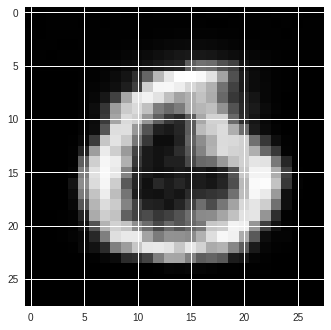

In [23]:
_outputs_0 = np.reshape(_outputs[0], [28, 28])
plt.imshow(_outputs_0, cmap='gray')
plt.show()

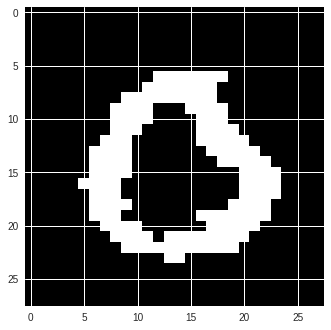

In [24]:
_outputs_0_rint = np.rint(np.reshape(_outputs[0], [28, 28]))  # 픽셀값 소수 첫째자리 반올림
plt.imshow(_outputs_0_rint, cmap='gray')
plt.show()

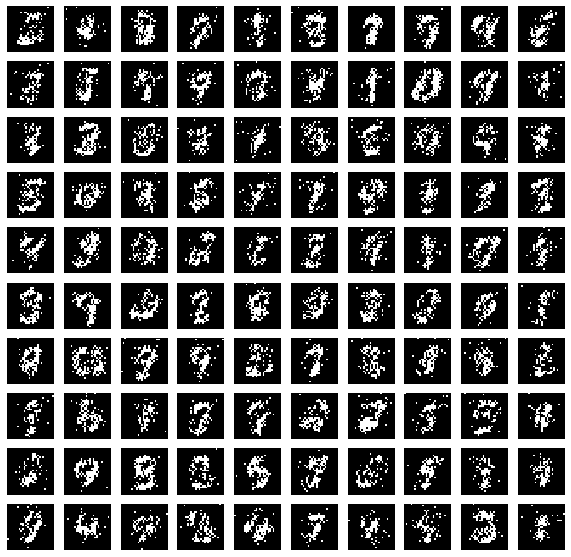

In [17]:
_X_sample = np.zeros(shape=[100, Xdim])
for i in tqdm(range(Xdim)):
    _X_predicted = sess.run(outputs_prob_list[i], feed_dict = {X: _X_sample})
    for j, p in enumerate(_X_predicted):
        _sample = np.random.binomial(1, p)
        _X_sample[j, i] = _sample

_X_sample = np.reshape(_X_sample, [_X_sample.shape[0], Height, Width])

plt.figure(figsize=[10, 10])
for i in range(100):
    plt.subplot(10, 10, i+1)
    plt.imshow(_X_sample[i], cmap='gray')
    plt.xticks([])
    plt.yticks([])
plt.show()

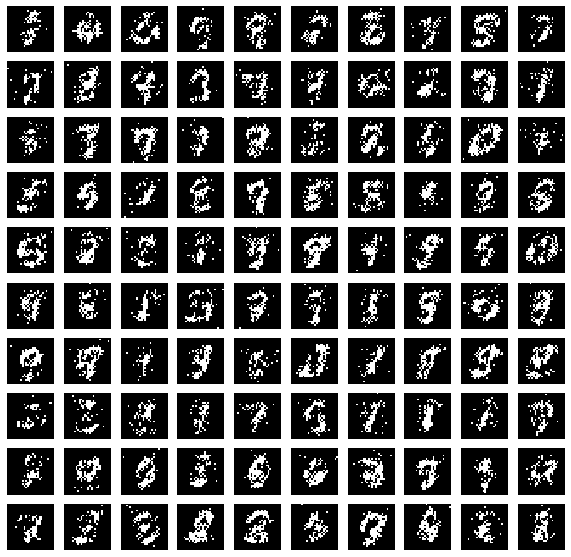

In [25]:
_X_sample_2 = np.zeros(shape=[100, Xdim])
for i in tqdm(range(Xdim)):
    _X_predicted = sess.run(outputs_prob_list[i], feed_dict = {X: _X_sample_2})
    for j, p in enumerate(_X_predicted):
        _sample = np.random.binomial(1, p)
        _X_sample_2[j, i] = _sample

_X_sample_2 = np.rint(np.reshape(_X_sample_2, [_X_sample_2.shape[0], Height, Width]))  # 소수 첫째자리에서 반올림

plt.figure(figsize=[10, 10])
for i in range(100):
    plt.subplot(10, 10, i+1)
    plt.imshow(_X_sample_2[i], cmap='gray')
    plt.xticks([])
    plt.yticks([])
plt.show()

In [18]:
print('done')

done


## 새로운 함수 익히기

##### np.fromfunction

In [0]:
np.fromfunction(lambda i, j: i == j, (3, 3), dtype=int)  # function, shape, dtype

array([[ True, False, False],
       [False,  True, False],
       [False, False,  True]])

In [0]:
np.fromfunction(lambda i, j: i > j, (4, 4), dtype=int)

array([[False, False, False, False],
       [ True, False, False, False],
       [ True,  True, False, False],
       [ True,  True,  True, False]])

##### tf.concat

In [0]:
t1 = [[1, 2, 3], [4, 5, 6]]  # (2, 3)
t2 = [[7, 8, 9], [10, 11, 12]]  # (2, 3)
print(np.shape(t1))

# tf.concat(values, axis, name='concat')  -> axis: Dimension along which to concatenate
print(tf.concat([t1, t2], 0)) # [[1, 2, 3], [4, 5, 6], [7, 8, 9], [10, 11, 12]] 
#    => 0-dim, 즉 가장 첫번째 dim 기준으로 concatenate
#        => 0-dim의 숫자가 바뀜. concat( (2,3), (2,3), axis = 0 )  => (4, 3)
print()
print(tf.concat([t1, t2], 1)) # [[1, 2, 3, 7, 8, 9], [4, 5, 6, 10, 11, 12]]
#    => 1-dim 기준으로 concatenate
#        => 1-dim의 숫자가 바뀜. concat( (2,3), (2,3), axis = 0 )  => (2, 6)

(2, 3)
Tensor("concat_2:0", shape=(4, 3), dtype=int32)

Tensor("concat_3:0", shape=(2, 6), dtype=int32)


##### tf.get_variable()

_Gets an existing variable with these parameters or create a new one.

_This function prefixes the name with the current variable scope and performs reuse checks.

##### tf.squeeze()

Removes dimensions of size 1 from the shape of a tensor

In [0]:
# 't' is a tensor of shape [1, 2, 1, 3, 1, 1]
tf.shape(tf.squeeze(t))  # [2, 3]

In [0]:
# 't' is a tensor of shape [1, 2, 1, 3, 1, 1]
tf.shape(tf.squeeze(t, [2, 4]))  # [1, 2, 3, 1]

##### tf.stack

In [0]:
x = tf.constant([1, 4])  # shape (1,2)
y = tf.constant([2, 5])  # shape (1,2)
z = tf.constant([3, 6])
tf.stack([x, y, z])  # [[1, 4], [2, 5], [3, 6]] (Pack along first dim.)
tf.stack([x, y, z], axis=1)  # [[1, 2, 3], [4, 5, 6]]
# axis = 1 기준으로 stack
# => (1,2)인 것들을 axis=1 기준 stack하면, 1-dim의 값인 2는 유지한채 stack -> (3,2)

##### astype(np.int)

In [0]:
a = np.array([1.3])
print(a)
_a = a.astype(np.int)
print(_a)